### DASC521: Intro to ML
### Homework 3: Discrimination by Regression
### Gamze Keçibaş 60211  
---
### CONTENT
- **Step 01.** Import libraries    
- **Step 02.** Generate random data    
- **Step 03.** Set parameters and functions    
- **Step 04.** Discrimination by regression
- **Step 05.** Create confusion matrix
- **Step 06.** Plotting

**Step 01.** Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(1)

**Step 02.** Generate random data  
   - Data processing

In [2]:
# Provided mean parameters
class_means = np.array([[+0.0, +2.5], 
                        [-2.5, -2.0], 
                        [+2.5, -2.0]])
# Provided covariance parameters
class_covariances = np.array([[[+3.2, +0.0], 
                               [+0.0, +1.2]],
                              [[+1.2, 0.8], 
                               [0.8, +1.2]],
                              [[+1.2, -0.8], 
                               [-0.8, +1.2]]])
# Provided sample sizes
class_sizes = np.array([120, 80, 100])

# Randomly generate samples
points1 = np.random.multivariate_normal(class_means[0,:], class_covariances[0,:,:], class_sizes[0])
points2 = np.random.multivariate_normal(class_means[1,:], class_covariances[1,:,:], class_sizes[1])
points3 = np.random.multivariate_normal(class_means[2,:], class_covariances[2,:,:], class_sizes[2])
X = np.vstack((points1, points2, points3))

# Generate labels
y = np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2])))

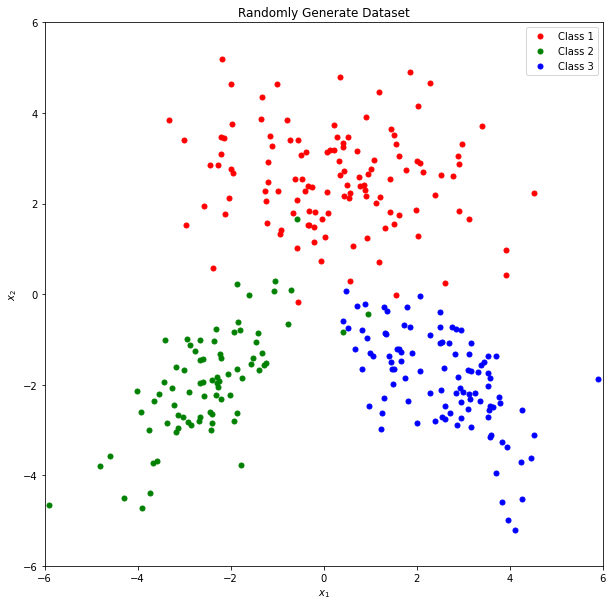

In [3]:
# DATA PROCESSING
# read data into memory
data_set = np.hstack((X, y[:, None]))

# get X and y values
X = data_set[:,[0, 1]]
y_truth = data_set[:,2].astype(int)

# get number of classes and number of samples
K = np.max(y_truth)
N = data_set.shape[0]

# one-of-K encoding
Y_truth = np.zeros((N, K)).astype(int)
Y_truth[range(N), y_truth - 1] = 1

# Plot dataset
plt.figure(figsize = (10, 10))
plt.plot(points1[:,0], points1[:,1], "r.", markersize = 10)
plt.plot(points2[:,0], points2[:,1], "g.", markersize = 10)
plt.plot(points3[:,0], points3[:,1], "b.", markersize = 10)
plt.xlim((-6, +6))
plt.ylim((-6, +6))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title('Randomly Generate Dataset')
plt.legend(['Class 1','Class 2','Class 3'])
plt.show()

**Step 03.** Set parameters and functions

In [4]:
# set learning parameters
eta = 0.01
epsilon = 0.001

# randomly initalize W and w0
w = np.random.uniform(low = -0.01, high = 0.01, size = (X.shape[1], K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))

# define the sigmoid function
def sigmoid(X, w, w0):
    return(1/(1 + np.exp(-(np.matmul(X, w) + w0))))

# define functions of change in wegihts
def del_w(LR, X, Y_truth, Y_predicted):
    return(LR*np.asarray([-np.matmul(Y_truth[:,c] - Y_predicted[:,c], X) for c in range(K)]).transpose())

def del_w0(LR, Y_truth, Y_predicted):
    return(-LR*np.sum(Y_truth - Y_predicted, axis = 0))

**Step 04.** Discrimination by regression

In [5]:
# learn W and w0 using gradient descent
iteration = 1
objective_values = []

while 1:
    Y_predicted = sigmoid(X, w, w0)

    objective_values = np.append(objective_values, np.sum(0.5*(Y_truth- Y_predicted)**2))

    w_new = w - del_w(eta, X, Y_truth, Y_predicted)
    w0_new = w0 -del_w0(eta, Y_truth, Y_predicted)

    if np.sqrt(np.sum((w0_new - w0))**2 + np.sum((w_new - w)**2)) < epsilon:
        break
    w, w0= w_new, w0_new
    iteration = iteration + 1
print(w)
print(w0)

[[ 0.42854028 -2.1834883   2.07150796]
 [ 3.98895367 -1.68764395 -2.19526022]]
[[-1.41906338 -2.63345208 -3.45798382]]


**Step 05.** Create confusion matrix

In [6]:
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
CM = pd.crosstab(y_predicted, y_truth, rownames = ['y_pred'], colnames = ['y_truth'])
print(CM)

y_truth    1   2   3
y_pred              
1        115   2   1
2          2  76   0
3          3   2  99


**Step 06.** Plotting  
   - Convergence Plot (Error vs Iteration)  
   - Decision Boundaries  

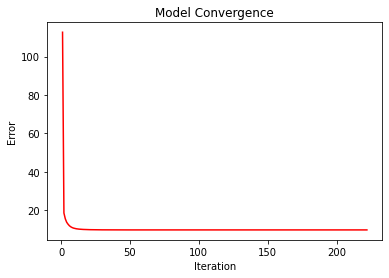

In [7]:
plt.figure()
plt.plot(range(1, iteration + 1), objective_values, "r-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title('Model Convergence')
plt.show()

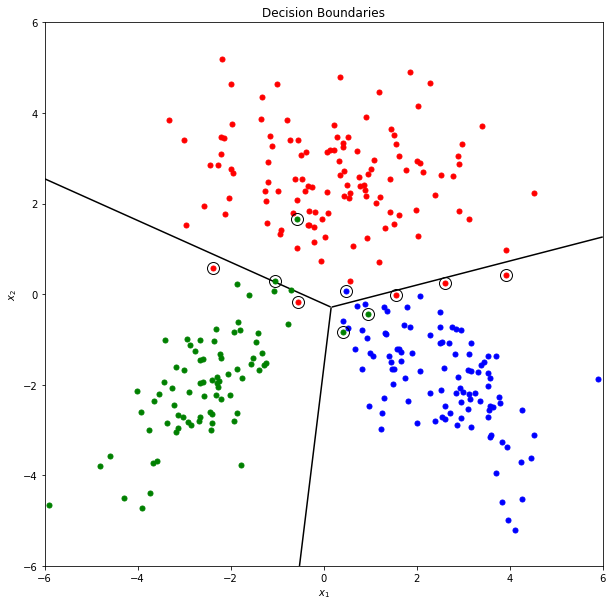

In [8]:
x1_interval = np.linspace(-6, +6, 1201)
x2_interval = np.linspace(-6, +6, 1201)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
discriminant_values = np.zeros((len(x1_interval), len(x2_interval), K))
for c in range(K):
    discriminant_values[:,:,c] = w[0, c] * x1_grid + w[1, c] * x2_grid + w0[0, c]

A = discriminant_values[:,:,0]
B = discriminant_values[:,:,1]
C = discriminant_values[:,:,2]
A[(A < B) & (A < C)] = np.nan
B[(B < A) & (B < C)] = np.nan
C[(C < A) & (C < B)] = np.nan
discriminant_values[:,:,0] = A
discriminant_values[:,:,1] = B
discriminant_values[:,:,2] = C

plt.figure(figsize = (10, 10))
plt.plot(X[y_truth == 1, 0], X[y_truth == 1, 1], "r.", markersize = 10)
plt.plot(X[y_truth == 2, 0], X[y_truth == 2, 1], "g.", markersize = 10)
plt.plot(X[y_truth == 3, 0], X[y_truth == 3, 1], "b.", markersize = 10)
plt.plot(X[y_predicted != y_truth, 0], X[y_predicted != y_truth, 1], "ko", markersize = 12, fillstyle = "none")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,1], levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,2], levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,1] - discriminant_values[:,:,2], levels = 0, colors = "k")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title('Decision Boundaries')
plt.show()